<a href="https://colab.research.google.com/github/kevirui/prevision-de-atrasos-de-vuelos/blob/main/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import yellowbrick
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/kevirui/prevision-de-atrasos-de-vuelos/refs/heads/main/flights.csv"

data = pd.read_csv(url)

data.shape

(71175, 11)

In [16]:
data.head(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [18]:
data.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [19]:
data.describe(include="O")

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


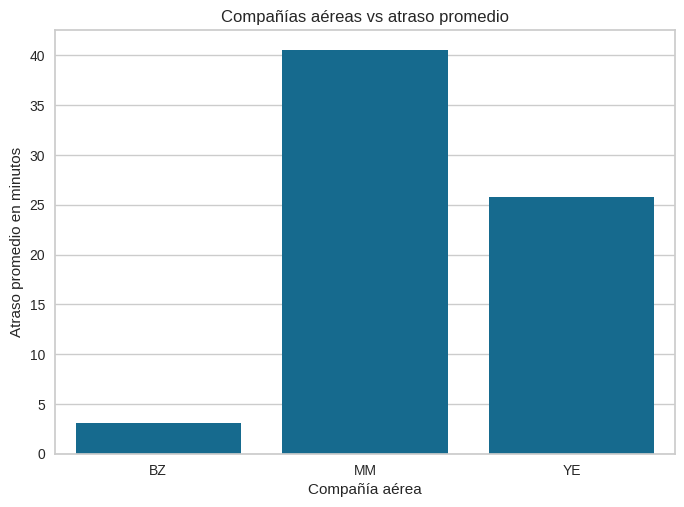

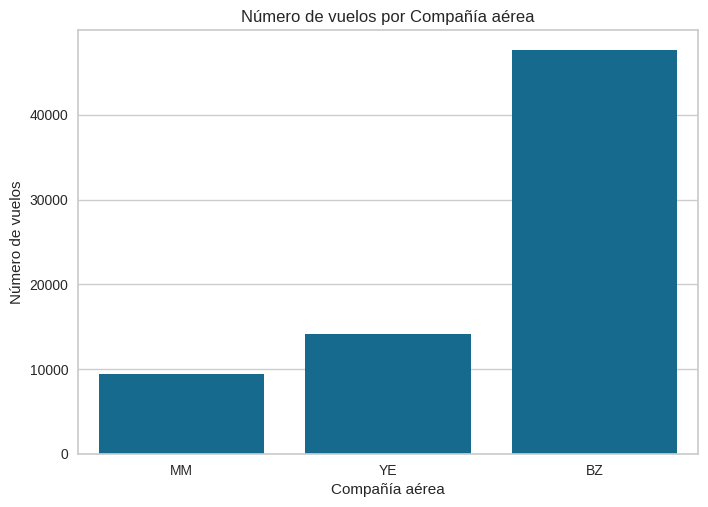

In [20]:
avg_delay = data.groupby('airline')['delay'].mean().reset_index()

sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aéreas vs atraso promedio')
plt.xlabel('Compañía aérea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='airline')
plt.title('Número de vuelos por Compañía aérea')
plt.xlabel('Compañía aérea')
plt.ylabel('Número de vuelos')

plt.show()

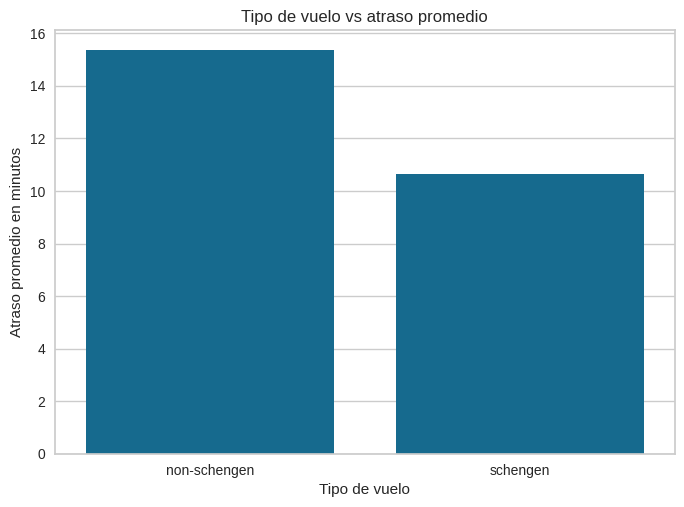

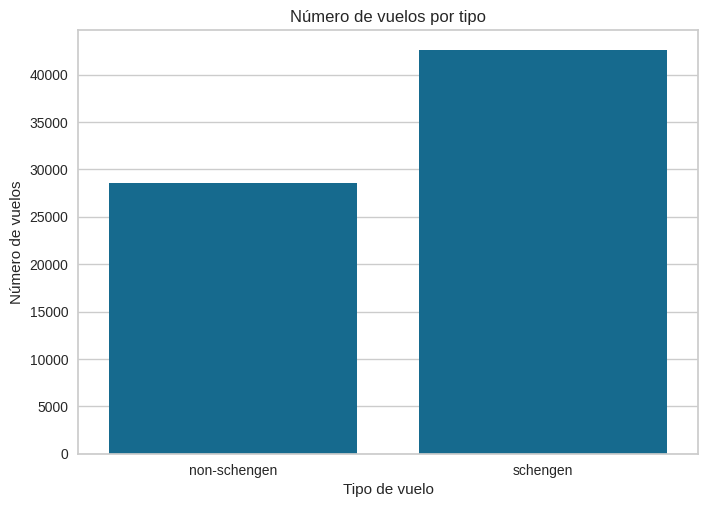

In [21]:
avg_delay = data.groupby('schengen')['delay'].mean().reset_index()

sns.barplot(x='schengen', y='delay', data=avg_delay)

plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

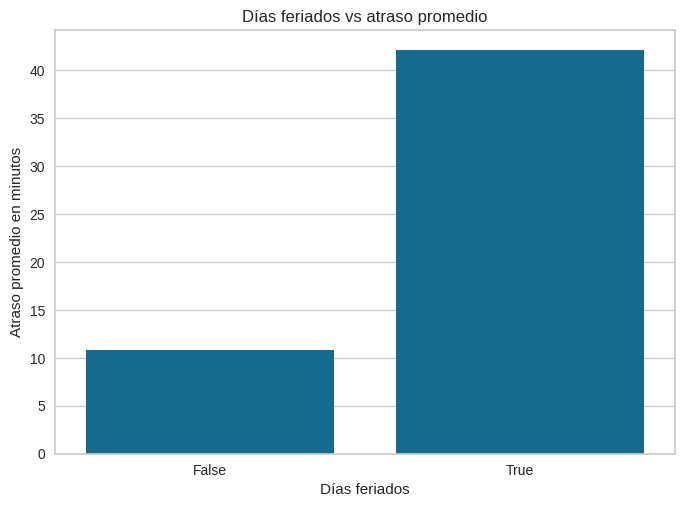

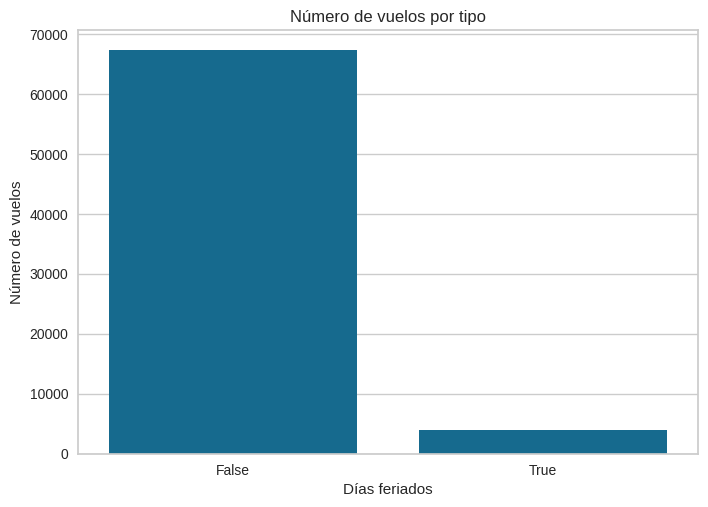

In [22]:
avg_delay = data.groupby('is_holiday')['delay'].mean().reset_index()

sns.barplot(x='is_holiday', y='delay', data=avg_delay)

plt.title('Días feriados vs atraso promedio')
plt.xlabel('Días feriados')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data=data, x='is_holiday')
plt.title('Número de vuelos por tipo')
plt.xlabel('Días feriados')
plt.ylabel('Número de vuelos')
plt.show()

In [23]:
data['aircraft_type'].value_counts().index

Index(['Airbus A320', 'Airbus A330', 'Boeing 787', 'Embraer E175',
       'Boeing 737', 'Boeing 777'],
      dtype='object', name='aircraft_type')

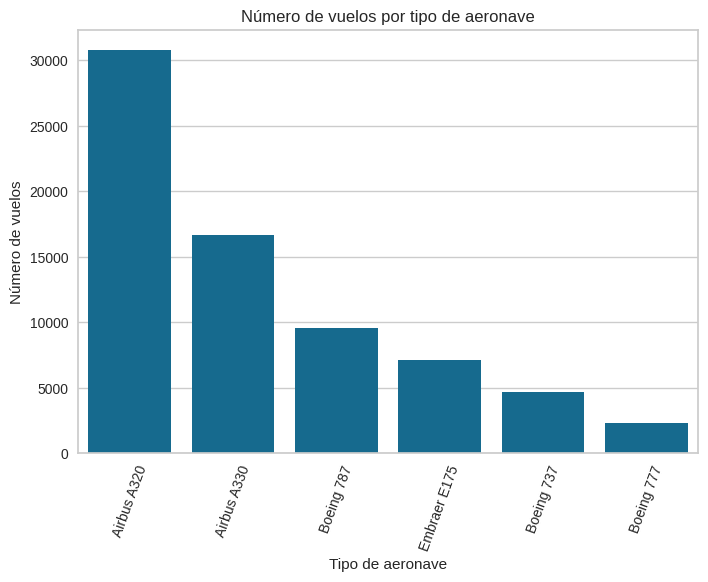

In [24]:
order = data['aircraft_type'].value_counts().index

sns.countplot(data=data, x='aircraft_type', order=order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

Text(0.5, 1.0, 'Distribución de las horas de llegada')

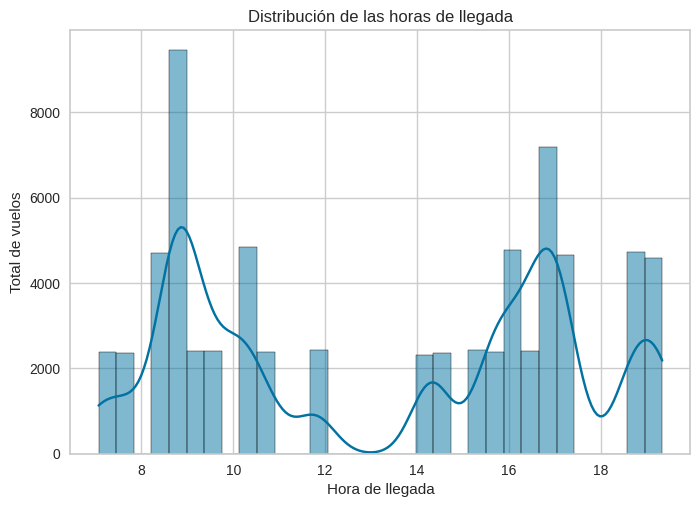

In [27]:
sns.histplot(data=data, x="arrival_time", kde=True)
plt.xlabel("Hora de llegada")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de llegada")

# Función Freedman - Diaconis Rule

In [28]:
def ancho_bin(df, column):
  q75, q25 = np.percentile(df[column], [75, 25])
  iqr = q75 - q25
  return 2 * iqr * np.power(len(df[column]), -1/3)

Text(0.5, 1.0, 'Distribución de las horas de llegada')

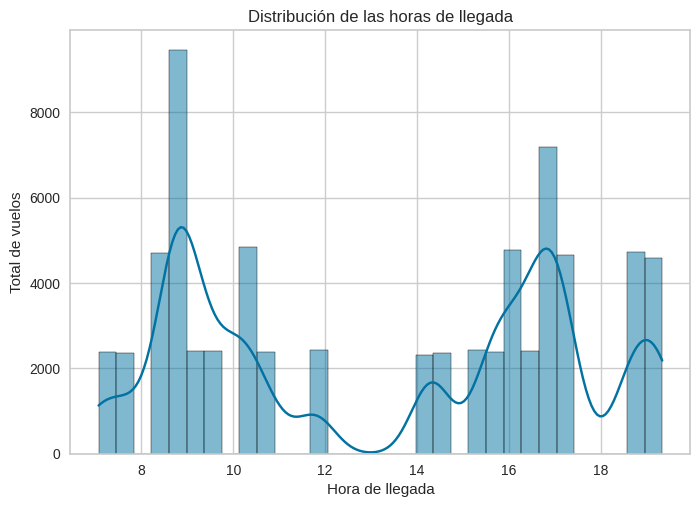

In [29]:
binwidth = ancho_bin(data, 'arrival_time')
sns.histplot(data=data, x="arrival_time", kde=True, binwidth=binwidth)
plt.xlabel("Hora de llegada")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de llegada")

Text(0.5, 1.0, 'Distribución de las horas de salida')

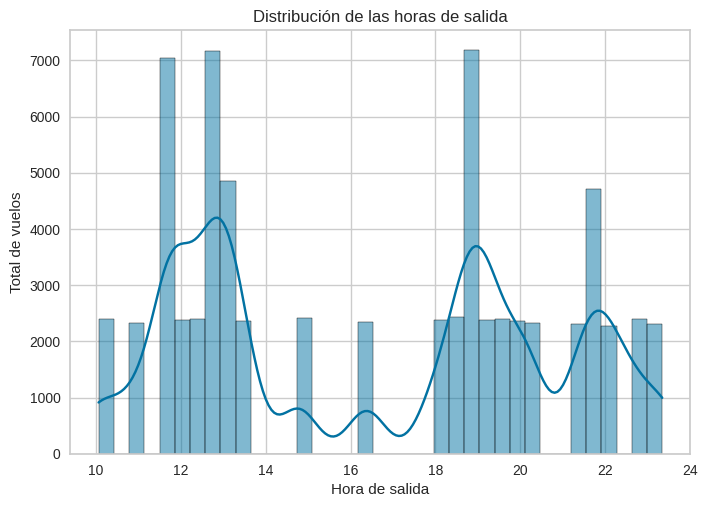

In [30]:
binwidth = ancho_bin(data, 'departure_time')
sns.histplot(data=data, x="departure_time", kde=True, binwidth=binwidth)
plt.xlabel("Hora de salida")
plt.ylabel("Total de vuelos")
plt.title("Distribución de las horas de salida")

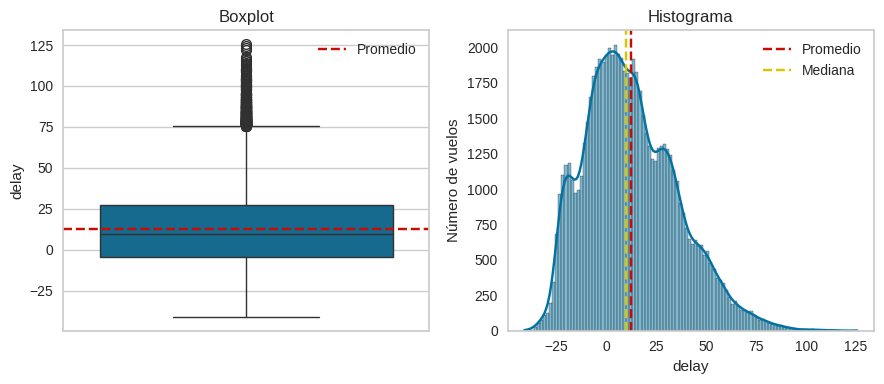

In [36]:
atraso_promedio = data['delay'].mean()
atraso_mediana = data['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9, 4))

sns.boxplot(data=data, y="delay", ax=ax[0])
ax[0].set_title("Boxplot")
ax[0].axhline(y=atraso_promedio, color='r', linestyle='--', label="Promedio")
ax[0].legend()

binwidth = ancho_bin(data, 'delay')
sns.histplot(data=data, x="delay", ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel("Número de vuelos")
plt.grid(False)
ax[1].set_title("Histograma")
ax[1].axvline(x=atraso_promedio, color='r', linestyle='--', label="Promedio")
ax[1].axvline(x=atraso_mediana, color='y', linestyle='--', label="Mediana")
ax[1].legend()

plt.tight_layout()

plt.show()